# A Predictive Analysis of Titanic Survivors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling

# **importing the dataset**


In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Checking information on the table

In [3]:
# as we can see below is that some information are lost 
# as in the columns = 'Age','Cabin' and Embarked
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 *The next table is shown the amount of missing values regarding  the columns 'Age','Cabin' and Embarked*

In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

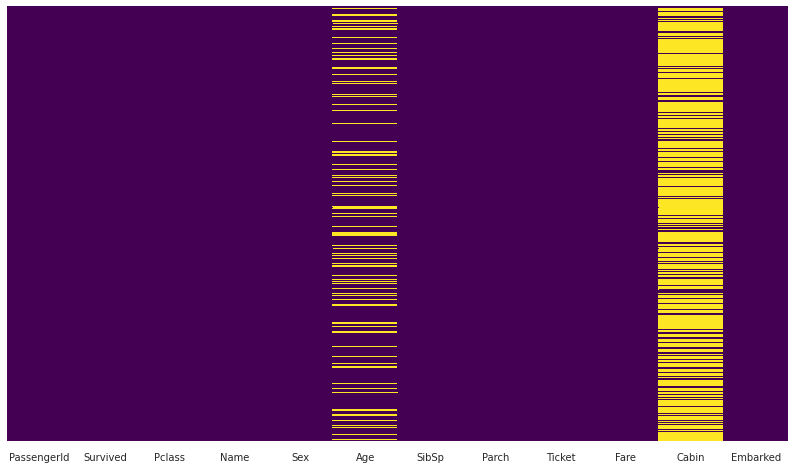

In [5]:
# in order to see the missing values disposed in the table a heatmap is performed
plt.figure(figsize=[14,8])
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [6]:
#Pandas profiling
profile = pandas_profiling.ProfileReport(df_train)


In [7]:
profile

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# **exploratory data analysis**

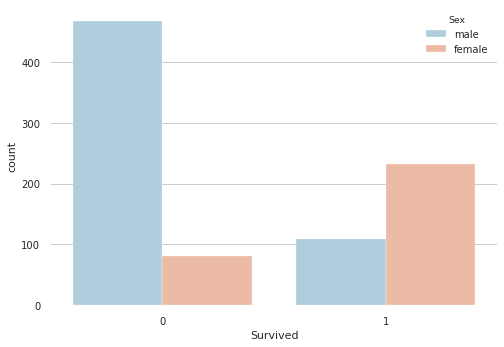

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df_train, hue='Sex',palette='RdBu_r')
# As we can see that more men died than women and the number of women survived was much greater
# than surviving men

In [9]:
#Observe numbers of survivors and number of deaths and their respective percentages
num_man_surv = len(df_train[(df_train['Survived']==1) & (df_train['Sex']=='male')])
num_man_died = len(df_train[(df_train['Survived']==0) & (df_train['Sex']=='male')])
num_wman_surv = len(df_train[(df_train['Survived']==1) & (df_train['Sex']=='female')])
num_wman_died = len(df_train[(df_train['Survived']==0) & (df_train['Sex']=='female')])
print("Number of survivors: {0}".format(num_man_surv+num_wman_surv))
print("Number of deaths: {0}".format(num_man_died+num_wman_died))
print("Number of men survived: {0}  ({1:2.2f}%)".format(num_man_surv, num_man_surv/(num_man_surv + num_man_died)*100))
print("Number of women survived: {0}  ({1:2.2f}%)".format(num_wman_surv, num_wman_surv/(num_wman_surv + num_wman_died)*100))



Number of survivors: 342
Number of deaths: 549
Number of men survived: 109  (18.89%)
Number of women survived: 233  (74.20%)


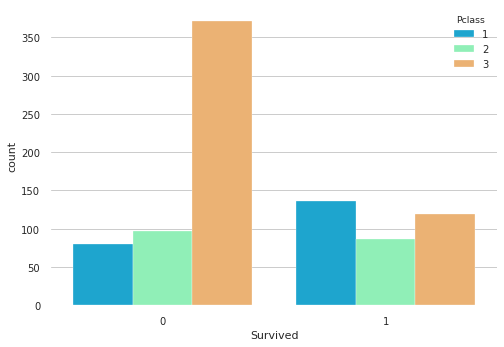

In [10]:
#table of Survived splited by class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')
# the number of deaths for third class is bigger than in comparisson with other class

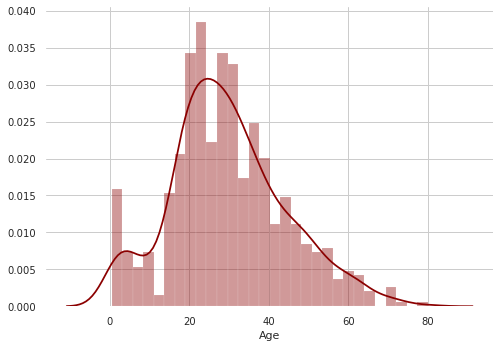

In [11]:
sns.distplot(df_train['Age'].dropna(),kde=True,color='darkred',bins=30)
# Most travelers were aged around 20


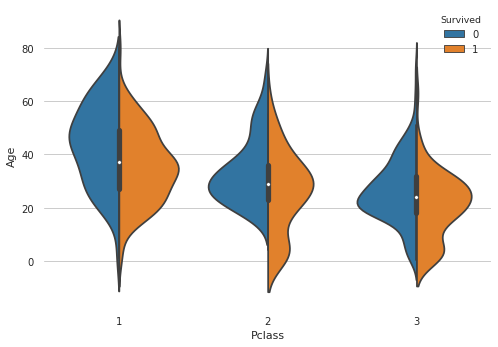

In [12]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", split=True, data=df_train)
# the most of third class is younger than first class there is a relation in this variable with the death number

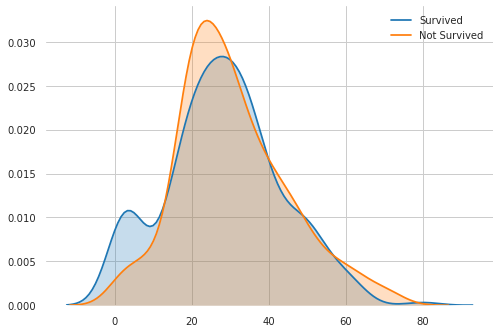

In [13]:
#Age vs Survived
sns.kdeplot(df_train['Age'][df_train.Survived == 1], shade=True)
sns.kdeplot(df_train['Age'][df_train.Survived == 0], shade=True)
plt.legend(['Survived', 'Not Survived'])


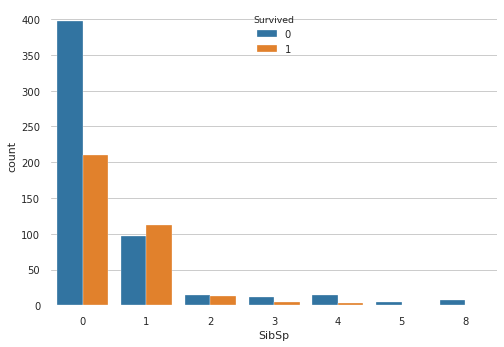

In [14]:
sns.countplot(x='SibSp',hue='Survived',data=df_train)
# most people killed in the disaster were traveling alone


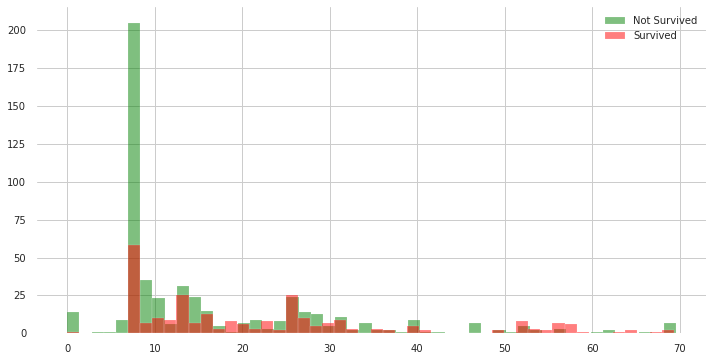

In [15]:
# Fare
df_train[(df_train['Fare']<70) & (df_train['Survived']==0)]['Fare'].hist(color='green',bins=50,alpha=0.5,figsize=[12,6]) 
df_train[(df_train['Fare']<70) & (df_train['Survived']==1)]['Fare'].hist(color='red',bins=50,alpha=0.5,figsize=[12,6])
plt.legend(['Not Survived', 'Survived'])
#The most people that died paied a low price

# Clearing the data

We have a lot of missing values in the column age. We will generate a random number between (mean- std) and (mean + std) for each Pclass

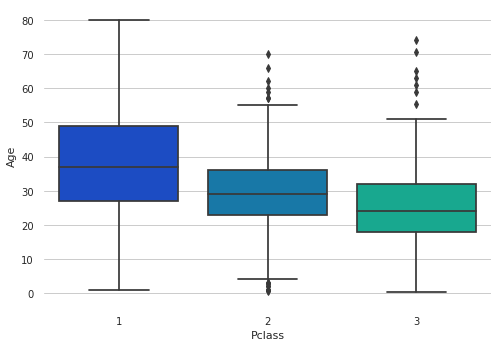

In [16]:
# first as one can see there is as mean age for each class
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
      
            return round(df_train[df_train['Pclass']==1]['Age'].mean()) # arredondando
            
        elif Pclass == 2:
       
            return round(df_train[df_train['Pclass']==2]['Age'].mean())

        else:
       
            return round(df_train[df_train['Pclass']==3]['Age'].mean())

    else:
        return Age
    


    

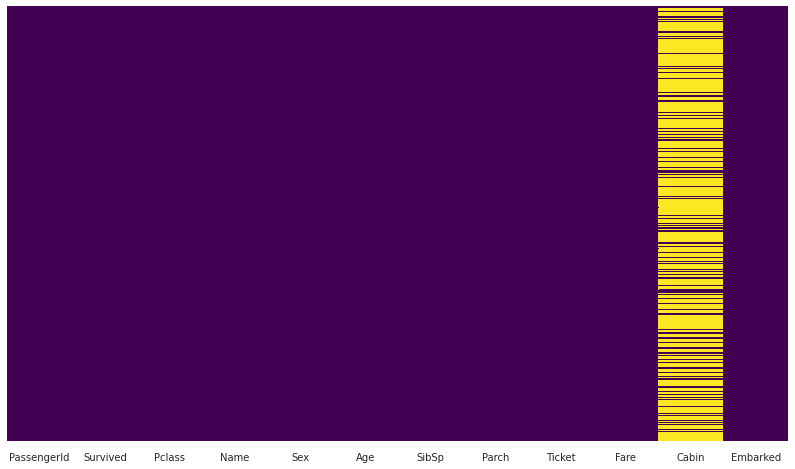

In [18]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)
# As we can see the column age was filled with the mean age os each class that person is included
plt.figure(figsize=[14,8])
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [19]:
#take the column Cabin out of the analysis
df_train.drop('Cabin',axis=1,inplace=True)

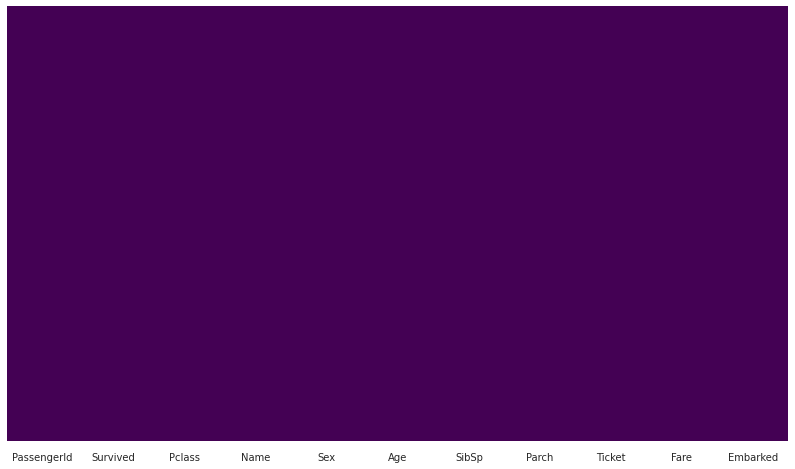

In [20]:
plt.figure(figsize=[14,8])
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [21]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [22]:
df_train.dropna(inplace=True) # take out the row that exist a NAN

In [23]:
df_train.isnull().sum()
# now the datas are cleaned

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Converting categorical resources

In [24]:
# We need to convert the categorical variables into binary variable as shown below
sex = pd.get_dummies(df_train['Sex'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade # drop_first=True > Para evitar a multi-colinaridade
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)

In [25]:
embark

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[889 rows x 2 columns]

In [26]:
df_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_train = pd.concat([df_train,sex,embark],axis=1)

In [27]:
df_train

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              1         0       3  22.0      1      0   7.2500     1  0  1
1              2         1       1  38.0      1      0  71.2833     0  0  0
2              3         1       3  26.0      0      0   7.9250     0  0  1
3              4         1       1  35.0      1      0  53.1000     0  0  1
4              5         0       3  35.0      0      0   8.0500     1  0  1
..           ...       ...     ...   ...    ...    ...      ...   ... .. ..
886          887         0       2  27.0      0      0  13.0000     1  0  1
887          888         1       1  19.0      0      0  30.0000     0  0  1
888          889         0       3  25.0      1      2  23.4500     0  0  1
889          890         1       1  26.0      0      0  30.0000     1  0  0
890          891         0       3  32.0      0      0   7.7500     1  1  0

[889 rows x 10 columns]

# Training and testing using LOGISTIC REGRESSION

In [28]:
#importin regression logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [29]:
x=df_train.drop('Survived',axis=1)
y=df_train['Survived']


In [30]:
#spliting the datas in training and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [31]:
#training the model
logmodel= LogisticRegression(max_iter = 1000)
logmodel.fit(x_train,y_train)
pred_train = logmodel.predict(x_train)
pred_test = logmodel.predict(x_test)


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       158
           1       0.84      0.71      0.77       109

    accuracy                           0.82       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.82      0.82       267



In [33]:
print(confusion_matrix(y_test,pred_test))

[[143  15]
 [ 32  77]]


In [34]:
print("Training accuracy: ", accuracy_score(y_train, pred_train))
print("Testing accuracy: ", accuracy_score(y_test, pred_test))

Training accuracy:  0.8006430868167203
Testing accuracy:  0.8239700374531835


# Training and testing using RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train,y_train)
pred_rand = rfc.predict(x_test)

In [36]:
pred_rand = rfc.predict(x_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       158
           1       0.87      0.73      0.80       109

    accuracy                           0.85       267
   macro avg       0.85      0.83      0.84       267
weighted avg       0.85      0.85      0.84       267



In [38]:
print(confusion_matrix(y_test,pred_rand))

[[146  12]
 [ 29  80]]


# Sending data using Random Forest

In [39]:
#TEST Datas
df2_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df2_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [40]:
df2_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

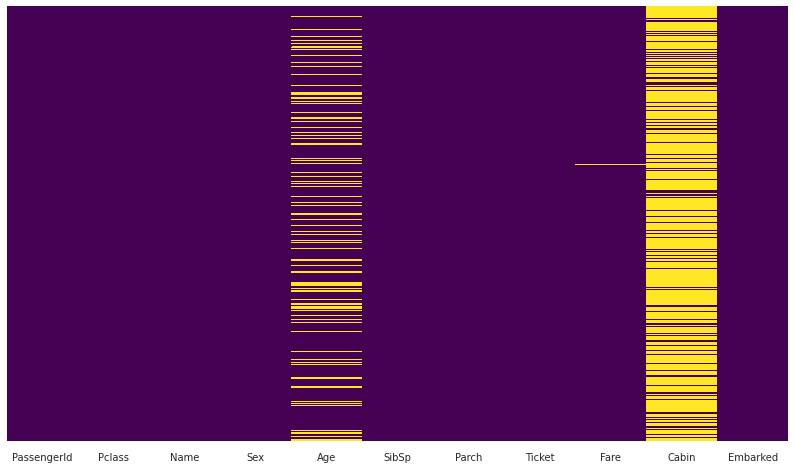

In [41]:
plt.figure(figsize=[14,8])
sns.heatmap(df2_test.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [42]:
df2_test['Age'] = df2_test[['Age','Pclass']].apply(impute_age,axis=1)

In [43]:
df2_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
# take the Cabin out of the model
del df2_test['Cabin']

In [45]:
df2_test['Fare'].fillna(df2_test['Fare'].dropna().median(), inplace=True)

In [46]:

sex = pd.get_dummies(df2_test['Sex'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade # drop_first=True > Para evitar a multi-colinaridade
embark = pd.get_dummies(df2_test['Embarked'],drop_first=True)

In [47]:
df2_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df2_test = pd.concat([df2_test,sex,embark],axis=1)

**Using Random forest model**

In [48]:
predictions = rfc.predict(df2_test)
output = pd.DataFrame({'PassengerId': df2_test.PassengerId, 'Survived': predictions})
output

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [49]:
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
